In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%matplotlib inline

In [4]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [5]:
%pwd

'/Users/TakuyaSakaguchi/Jupyter_Python3/OpenCle'

In [5]:
df_300k = pd.read_csv("300k_addresses.csv")

In [6]:
df_300k.head()

,addr_lat,addr_lon
0,41.200,-82
1,41.201,-82
2,41.202,-82
3,41.203,-82
4,41.204,-82


In [7]:
from geopy.distance import vincenty

def get_distance_between_two_stops(stopId1, stopId2):
    x = (df[df.stop_id == stopId1]["stop_lat"].values, df[df.stop_id == stopId1]["stop_lon"].values)

    y = (df[df.stop_id == stopId2]["stop_lat"].values, df[df.stop_id == stopId2]["stop_lon"].values)

    return vincenty(x, y).miles

In [8]:
def dataframe_of_close_stops(given_lat, given_lon, df, given_range=0.007225):
    selectedDf = df[(df.stop_lat > (given_lat - given_range)) \
                    & (df.stop_lat < (given_lat + given_range))\
                    &(df.stop_lon > (given_lon - given_range)) \
                    & (df.stop_lon < (given_lon + given_range))]
    return selectedDf

In [9]:
df_stops = pd.read_csv("stops.csv")

In [10]:
def get_number_of_close_stops(given_lat, given_lon, df, given_range=0.007225):
    number = len(dataframe_of_close_stops(given_lat, given_lon, df, given_range))
    return number

In [11]:
def get_distance_to_closest_bus_stop(given_lat, given_lon, df, given_range=0.007225):
    if not get_number_of_close_stops(given_lat, given_lon, df, given_range) == 0:
        close_stops_df = dataframe_of_close_stops(given_lat, given_lon, df, given_range)
        close_stops_plus_distance_df = Add_distance_to_dataframe(close_stops_df,given_lat, given_lon)
        return close_stops_plus_distance_df.loc[close_stops_plus_distance_df.distance == close_stops_plus_distance_df.distance.min()].distance
    else:
        return np.NaN

In [27]:
def Add_distance_to_dataframe(addr_df, destination_lat, destination_lon):
    addr_df.index = range(0, len(addr_df))
    for i in range(len(addr_df)):
        addr_df.loc[i, "distance"] = vincenty((destination_lat, destination_lon), (addr_df.loc[i, "stop_lat"], addr_df.loc[i,"stop_lon"])).miles
    return addr_df

In [12]:
df_stops.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station
0,00001,NaN,COLUMBUS ST & BROADWAY,NaN,41.392864,-81.536557,NaN,NaN,0,NaN
1,00002,NaN,10800 BROOKPARK RD (HOME DEPOT),NaN,41.418556,-81.760788,NaN,NaN,0,NaN
2,00004,NaN,EUCLID AV & E 101ST ST,NaN,41.503712,-81.617399,NaN,NaN,0,NaN
3,00005,NaN,10081 W RIDGEWOOD DR,NaN,41.384525,-81.755926,NaN,NaN,0,NaN
4,00014,NaN,102 PROSPECT AV W,NaN,41.498030,-81.692012,NaN,NaN,0,NaN


In [13]:
def get_distance_and_coordinates_to_closest_bus_stop(given_lat, given_lon, df, given_range=0.007225):
    if not get_number_of_close_stops(given_lat, given_lon, df, given_range) == 0:
        close_stops_df = dataframe_of_close_stops(given_lat, given_lon, df, given_range)
        close_stops_plus_distance_df = Add_distance_to_dataframe(close_stops_df,given_lat, given_lon)
        distance = close_stops_plus_distance_df.loc[close_stops_plus_distance_df.distance == close_stops_plus_distance_df.distance.min()].distance
        stop_lat = close_stops_plus_distance_df.loc[close_stops_plus_distance_df.distance == close_stops_plus_distance_df.distance.min()].stop_lat
        stop_lon = close_stops_plus_distance_df.loc[close_stops_plus_distance_df.distance == close_stops_plus_distance_df.distance.min()].stop_lon
        return distance, stop_lat, stop_lon
    else:
        return np.NaN

In [14]:
for i in range(len(df_300k)):
    x= get_number_of_close_stops(df_300k.addr_lat[i], df_300k.addr_lon[i], df_stops)
    df_300k.set_value(i, "surrounding_stops", x)

KeyboardInterrupt: 

In [ ]:
for i in range(len(df_300k)):
    x= get_number_of_close_stops(df_300k.addr_lat[i], df_300k.addr_lon[i], df_stops,0.01445)
    df_300k.set_value(i, "surrounding_stops_a_mile", x)

In [ ]:
df_300k.describe()

In [25]:
df_300k.to_csv("new300k.csv")

In [26]:
df_selected = df_300k[df_300k.surrounding_stops_a_mile >=1]

In [27]:
df_selected.describe()

,addr_lat,addr_lon,surrounding_stops,surrounding_stops_a_mile
count,114554.000000,114554.000000,114554.000000,114554.000000
mean,41.438169,-81.679909,11.604885,46.410837
std,0.082503,0.149042,12.559817,38.970773
min,41.214000,-81.981000,0.000000,1.000000
25%,41.381000,-81.811000,0.000000,16.000000
50%,41.438000,-81.666000,9.000000,34.000000
75%,41.494000,-81.547000,18.000000,70.000000
max,41.651000,-81.425000,139.000000,257.000000


In [28]:
df = df_selected

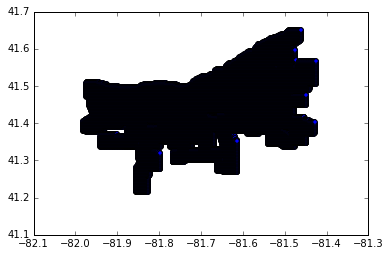

In [29]:
plt.scatter(df.addr_lon, df.addr_lat)

In [30]:
df.to_csv("115k_addr.csv")

In [31]:
df_small = df_300k[df_300k.surrounding_stops >=1]

In [32]:
df_small.describe()

,addr_lat,addr_lon,surrounding_stops,surrounding_stops_a_mile
count,83801.000000,83801.000000,83801.000000,83801.000000
mean,41.446771,-81.676746,15.863605,58.002375
std,0.074638,0.143471,12.168830,38.829693
min,41.221000,-81.974000,1.000000,2.000000
25%,41.398000,-81.800000,7.000000,27.000000
50%,41.449000,-81.658000,13.000000,50.000000
75%,41.494000,-81.550000,22.000000,81.000000
max,41.644000,-81.432000,139.000000,257.000000


In [33]:
df_small.to_csv("83k_addr.csv")

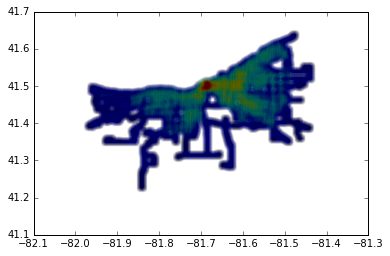

In [39]:
plt.scatter(df_small.addr_lon, df_small.addr_lat, c= df_small.surrounding_stops_a_mile, alpha = 0.009)

In [15]:
df_83k = pd.read_csv("83k_addr.csv")

In [16]:
df_83k.describe()

,Unnamed: 0,addr_lat,addr_lon,surrounding_stops,surrounding_stops_a_mile
count,83801.000000,83801.000000,83801.000000,83801.000000,83801.000000
mean,161873.613608,41.446771,-81.676746,15.863605,58.002375
std,71764.772696,0.074638,0.143471,12.168830,38.829693
min,13185.000000,41.221000,-81.974000,1.000000,2.000000
25%,100212.000000,41.398000,-81.800000,7.000000,27.000000
50%,171252.000000,41.449000,-81.658000,13.000000,50.000000
75%,225310.000000,41.494000,-81.550000,22.000000,81.000000
max,284354.000000,41.644000,-81.432000,139.000000,257.000000


In [51]:
df.rename(columns={'surrounding_stops': 'surrounding_stops_1mile', 'surrounding_stops_a_mile': 'surrounding_stops_2miles'}, inplace=True)

//anaconda/lib/python3.4/site-packages/pandas/core/frame.py:2697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [17]:
df_83k.head()

,Unnamed: 0,addr_lat,addr_lon,surrounding_stops,surrounding_stops_a_mile
0,13185,41.385,-81.974,2,9
1,13186,41.386,-81.974,2,9
2,13187,41.387,-81.974,2,9
3,13188,41.388,-81.974,2,9
4,13189,41.389,-81.974,2,9


In [19]:
df_83k["subtraction"] = df_83k.surrounding_stops_a_mile - df_83k.surrounding_stops

In [20]:
df_83k.describe()

,Unnamed: 0,addr_lat,addr_lon,surrounding_stops,surrounding_stops_a_mile,subtraction
count,83801.000000,83801.000000,83801.000000,83801.000000,83801.000000,83801.000000
mean,161873.613608,41.446771,-81.676746,15.863605,58.002375,42.138769
std,71764.772696,0.074638,0.143471,12.168830,38.829693,30.283846
min,13185.000000,41.221000,-81.974000,1.000000,2.000000,0.000000
25%,100212.000000,41.398000,-81.800000,7.000000,27.000000,17.000000
50%,171252.000000,41.449000,-81.658000,13.000000,50.000000,36.000000
75%,225310.000000,41.494000,-81.550000,22.000000,81.000000,61.000000
max,284354.000000,41.644000,-81.432000,139.000000,257.000000,211.000000


(41.2, 41.65)

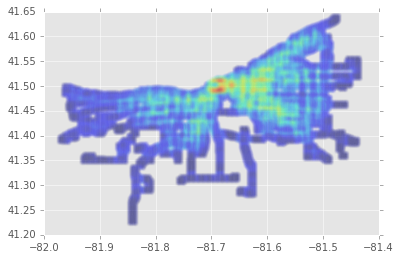

In [23]:
plt.scatter(df_83k.addr_lon, df_83k.addr_lat, c= df_83k.subtraction, alpha = 0.01)
plt.xlim(-82, -81.4)
plt.ylim(41.2,41.65)

In [22]:
plt.style.use("ggplot")

In [67]:
df_83k.head()

,addr_lat,addr_lon,surrounding_stops_1mile,surrounding_stops_2miles,subtraction
13185,41.385,-81.974,2,9,7
13186,41.386,-81.974,2,9,7
13187,41.387,-81.974,2,9,7
13188,41.388,-81.974,2,9,7
13189,41.389,-81.974,2,9,7


In [24]:
df_83k.index = range(0,len(df_83k))


In [25]:
df_83k.head()

,Unnamed: 0,addr_lat,addr_lon,surrounding_stops,surrounding_stops_a_mile,subtraction
0,13185,41.385,-81.974,2,9,7
1,13186,41.386,-81.974,2,9,7
2,13187,41.387,-81.974,2,9,7
3,13188,41.388,-81.974,2,9,7
4,13189,41.389,-81.974,2,9,7


In [30]:
for i in range(len(df_83k)):
    x = get_distance_and_coordinates_to_closest_bus_stop(df_83k.loc[i,"addr_lat"], df_83k.loc[i,"addr_lon"], df_stops)
    df_83k.loc[i,"distance"] = x[0].values
    df_83k.loc[i,"stop_lat"] = x[1].values
    df_83k.loc[i,"stop_lon"] = x[2].values



//anaconda/lib/python3.4/site-packages/pandas/core/indexing.py:266: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
//anaconda/lib/python3.4/site-packages/pandas/core/indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [29]:
df_83k.head()

,Unnamed: 0,addr_lat,addr_lon,surrounding_stops,surrounding_stops_a_mile,subtraction,distance,stop_lat,stop_lon
0,13185,41.385,-81.974,2,9,7,0.569814,41.391666,-81.96753
1,13186,41.386,-81.974,2,9,7,0.515709,41.391666,-81.96753
2,13187,41.387,-81.974,2,9,7,0.465562,41.391666,-81.96753
3,13188,41.388,-81.974,2,9,7,0.420792,41.391666,-81.96753
4,13189,41.389,-81.974,2,9,7,0.383287,41.391666,-81.96753


In [82]:
df_83k = df_83k.drop('distance2',1)


In [72]:
def testFunc(x=1):
    return x, x+1, x**x

In [73]:
testFunc()

(1, 2, 1)

In [74]:
x = testFunc(4)

In [75]:
x[1]

5

In [31]:
df_83k.head()

,Unnamed: 0,addr_lat,addr_lon,surrounding_stops,surrounding_stops_a_mile,subtraction,distance,stop_lat,stop_lon
0,13185,41.385,-81.974,2,9,7,0.569814,41.391666,-81.96753
1,13186,41.386,-81.974,2,9,7,0.515709,41.391666,-81.96753
2,13187,41.387,-81.974,2,9,7,0.465562,41.391666,-81.96753
3,13188,41.388,-81.974,2,9,7,0.420792,41.391666,-81.96753
4,13189,41.389,-81.974,2,9,7,0.383287,41.391666,-81.96753


In [32]:
df_83k.to_csv("83k_addr_close_stops_distance.csv")

In [33]:
df_83k.describe()

,Unnamed: 0,addr_lat,addr_lon,surrounding_stops,surrounding_stops_a_mile,subtraction,distance,stop_lat,stop_lon
count,83801.000000,83801.000000,83801.000000,83801.000000,83801.000000,83801.000000,83801.000000,83801.000000,83801.000000
mean,161873.613608,41.446771,-81.676746,15.863605,58.002375,42.138769,0.206996,41.446754,-81.676733
std,71764.772696,0.074638,0.143471,12.168830,38.829693,30.283846,0.136093,0.074351,0.143318
min,13185.000000,41.221000,-81.974000,1.000000,2.000000,0.000000,0.000427,41.227883,-81.967530
25%,100212.000000,41.398000,-81.800000,7.000000,27.000000,17.000000,0.095020,41.397864,-81.800384
50%,171252.000000,41.449000,-81.658000,13.000000,50.000000,36.000000,0.180633,41.449402,-81.657249
75%,225310.000000,41.494000,-81.550000,22.000000,81.000000,61.000000,0.299093,41.492624,-81.549916
max,284354.000000,41.644000,-81.432000,139.000000,257.000000,211.000000,0.621456,41.637051,-81.438542


In [1]:
from MapboxAPIWrapper import MapboxAPIWrapper
from MapLocation import MapLocation

wrapper = MapboxAPIWrapper()
wrapper.load_api_key_from_file("api_key.txt")

def getWalkingTime(origin_lat, origin_lon, destination_lat, destination_lon):
    # returns walking time in seconds
    origin = MapLocation(origin_lat, origin_lon)
    destination = MapLocation(destination_lat, destination_lon)
    results = wrapper.get_distance_from_api(origin, destination)
    return results["time"]




In [6]:
df_83k = pd.read_csv("83k_addr_close_stops_distance.csv")

In [7]:
df_83k.head()

,Unnamed: 0,Unnamed: 0.1,addr_lat,addr_lon,surrounding_stops,surrounding_stops_a_mile,subtraction,distance,stop_lat,stop_lon
0,0,13185,41.385,-81.974,2,9,7,0.569814,41.391666,-81.96753
1,1,13186,41.386,-81.974,2,9,7,0.515709,41.391666,-81.96753
2,2,13187,41.387,-81.974,2,9,7,0.465562,41.391666,-81.96753
3,3,13188,41.388,-81.974,2,9,7,0.420792,41.391666,-81.96753
4,4,13189,41.389,-81.974,2,9,7,0.383287,41.391666,-81.96753


In [9]:
df_83k.loc[0, "walking_time"]= getWalkingTime(df_83k.loc[0, "addr_lat"],df_83k.loc[0, "addr_lon"], df_83k.loc[0, "stop_lat"], df_83k.loc[0, "stop_lon"])

In [10]:
df_83k.head()

,Unnamed: 0,Unnamed: 0.1,addr_lat,addr_lon,surrounding_stops,surrounding_stops_a_mile,subtraction,distance,stop_lat,stop_lon,walking_time
0,0,13185,41.385,-81.974,2,9,7,0.569814,41.391666,-81.96753,985
1,1,13186,41.386,-81.974,2,9,7,0.515709,41.391666,-81.96753,NaN
2,2,13187,41.387,-81.974,2,9,7,0.465562,41.391666,-81.96753,NaN
3,3,13188,41.388,-81.974,2,9,7,0.420792,41.391666,-81.96753,NaN
4,4,13189,41.389,-81.974,2,9,7,0.383287,41.391666,-81.96753,NaN


In [11]:
for x in range(5):
    df_83k.loc[x, "walking_time"]= getWalkingTime(df_83k.loc[x, "addr_lat"],df_83k.loc[x, "addr_lon"], df_83k.loc[x, "stop_lat"], df_83k.loc[x, "stop_lon"])

In [12]:
df_83k.head()

,Unnamed: 0,Unnamed: 0.1,addr_lat,addr_lon,surrounding_stops,surrounding_stops_a_mile,subtraction,distance,stop_lat,stop_lon,walking_time
0,0,13185,41.385,-81.974,2,9,7,0.569814,41.391666,-81.96753,985
1,1,13186,41.386,-81.974,2,9,7,0.515709,41.391666,-81.96753,618
2,2,13187,41.387,-81.974,2,9,7,0.465562,41.391666,-81.96753,562
3,3,13188,41.388,-81.974,2,9,7,0.420792,41.391666,-81.96753,506
4,4,13189,41.389,-81.974,2,9,7,0.383287,41.391666,-81.96753,459


In [14]:
%time
3**3**3

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


7625597484987

In [18]:
%time

for x in range(5,10):
    df_83k.loc[x, "walking_time"]= getWalkingTime(df_83k.loc[x, "addr_lat"],df_83k.loc[x, "addr_lon"], df_83k.loc[x, "stop_lat"], df_83k.loc[x, "stop_lon"])

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.96 µs


In [17]:
list(range(5,10))

[5, 6, 7, 8, 9]

In [19]:
df_83k.head(10)

,Unnamed: 0,Unnamed: 0.1,addr_lat,addr_lon,surrounding_stops,surrounding_stops_a_mile,subtraction,distance,stop_lat,stop_lon,walking_time
0,0,13185,41.385,-81.974,2,9,7,0.569814,41.391666,-81.96753,985
1,1,13186,41.386,-81.974,2,9,7,0.515709,41.391666,-81.96753,618
2,2,13187,41.387,-81.974,2,9,7,0.465562,41.391666,-81.96753,562
3,3,13188,41.388,-81.974,2,9,7,0.420792,41.391666,-81.96753,506
4,4,13189,41.389,-81.974,2,9,7,0.383287,41.391666,-81.96753,459
5,5,13190,41.390,-81.974,2,9,7,0.355353,41.391666,-81.96753,1492
6,6,13191,41.391,-81.974,2,9,7,0.339365,41.391666,-81.96753,1498
7,7,13192,41.392,-81.974,2,9,7,0.337024,41.391666,-81.96753,1504
8,8,13193,41.393,-81.974,2,9,7,0.348608,41.391666,-81.96753,1672
9,9,13194,41.394,-81.974,2,9,7,0.372819,41.391666,-81.96753,1725


In [20]:

for x in range(10):
    df_83k.loc[x, "walking_time"]= getWalkingTime(df_83k.loc[x, "addr_lat"],df_83k.loc[x, "addr_lon"], df_83k.loc[x, "stop_lat"], df_83k.loc[x, "stop_lon"])

In [21]:
df_83k.head(10)

,Unnamed: 0,Unnamed: 0.1,addr_lat,addr_lon,surrounding_stops,surrounding_stops_a_mile,subtraction,distance,stop_lat,stop_lon,walking_time
0,0,13185,41.385,-81.974,2,9,7,0.569814,41.391666,-81.96753,985
1,1,13186,41.386,-81.974,2,9,7,0.515709,41.391666,-81.96753,618
2,2,13187,41.387,-81.974,2,9,7,0.465562,41.391666,-81.96753,562
3,3,13188,41.388,-81.974,2,9,7,0.420792,41.391666,-81.96753,506
4,4,13189,41.389,-81.974,2,9,7,0.383287,41.391666,-81.96753,459
5,5,13190,41.390,-81.974,2,9,7,0.355353,41.391666,-81.96753,1492
6,6,13191,41.391,-81.974,2,9,7,0.339365,41.391666,-81.96753,1498
7,7,13192,41.392,-81.974,2,9,7,0.337024,41.391666,-81.96753,1504
8,8,13193,41.393,-81.974,2,9,7,0.348608,41.391666,-81.96753,1672
9,9,13194,41.394,-81.974,2,9,7,0.372819,41.391666,-81.96753,1725


In [22]:
df =df_83k.head(10)

In [23]:
df


,Unnamed: 0,Unnamed: 0.1,addr_lat,addr_lon,surrounding_stops,surrounding_stops_a_mile,subtraction,distance,stop_lat,stop_lon,walking_time
0,0,13185,41.385,-81.974,2,9,7,0.569814,41.391666,-81.96753,985
1,1,13186,41.386,-81.974,2,9,7,0.515709,41.391666,-81.96753,618
2,2,13187,41.387,-81.974,2,9,7,0.465562,41.391666,-81.96753,562
3,3,13188,41.388,-81.974,2,9,7,0.420792,41.391666,-81.96753,506
4,4,13189,41.389,-81.974,2,9,7,0.383287,41.391666,-81.96753,459
5,5,13190,41.390,-81.974,2,9,7,0.355353,41.391666,-81.96753,1492
6,6,13191,41.391,-81.974,2,9,7,0.339365,41.391666,-81.96753,1498
7,7,13192,41.392,-81.974,2,9,7,0.337024,41.391666,-81.96753,1504
8,8,13193,41.393,-81.974,2,9,7,0.348608,41.391666,-81.96753,1672
9,9,13194,41.394,-81.974,2,9,7,0.372819,41.391666,-81.96753,1725


In [24]:
df.DbyWT = df.distance/df.walking_time

In [25]:
df


,Unnamed: 0,Unnamed: 0.1,addr_lat,addr_lon,surrounding_stops,surrounding_stops_a_mile,subtraction,distance,stop_lat,stop_lon,walking_time
0,0,13185,41.385,-81.974,2,9,7,0.569814,41.391666,-81.96753,985
1,1,13186,41.386,-81.974,2,9,7,0.515709,41.391666,-81.96753,618
2,2,13187,41.387,-81.974,2,9,7,0.465562,41.391666,-81.96753,562
3,3,13188,41.388,-81.974,2,9,7,0.420792,41.391666,-81.96753,506
4,4,13189,41.389,-81.974,2,9,7,0.383287,41.391666,-81.96753,459
5,5,13190,41.390,-81.974,2,9,7,0.355353,41.391666,-81.96753,1492
6,6,13191,41.391,-81.974,2,9,7,0.339365,41.391666,-81.96753,1498
7,7,13192,41.392,-81.974,2,9,7,0.337024,41.391666,-81.96753,1504
8,8,13193,41.393,-81.974,2,9,7,0.348608,41.391666,-81.96753,1672
9,9,13194,41.394,-81.974,2,9,7,0.372819,41.391666,-81.96753,1725


In [26]:
df['DistanceOverTime']= df.distance/df.walking_time

//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [27]:
df

,Unnamed: 0,Unnamed: 0.1,addr_lat,addr_lon,surrounding_stops,surrounding_stops_a_mile,subtraction,distance,stop_lat,stop_lon,walking_time,DistanceOverTime
0,0,13185,41.385,-81.974,2,9,7,0.569814,41.391666,-81.96753,985,0.000578
1,1,13186,41.386,-81.974,2,9,7,0.515709,41.391666,-81.96753,618,0.000834
2,2,13187,41.387,-81.974,2,9,7,0.465562,41.391666,-81.96753,562,0.000828
3,3,13188,41.388,-81.974,2,9,7,0.420792,41.391666,-81.96753,506,0.000832
4,4,13189,41.389,-81.974,2,9,7,0.383287,41.391666,-81.96753,459,0.000835
5,5,13190,41.390,-81.974,2,9,7,0.355353,41.391666,-81.96753,1492,0.000238
6,6,13191,41.391,-81.974,2,9,7,0.339365,41.391666,-81.96753,1498,0.000227
7,7,13192,41.392,-81.974,2,9,7,0.337024,41.391666,-81.96753,1504,0.000224
8,8,13193,41.393,-81.974,2,9,7,0.348608,41.391666,-81.96753,1672,0.000208
9,9,13194,41.394,-81.974,2,9,7,0.372819,41.391666,-81.96753,1725,0.000216
